Setting up the environment...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 test set loaded: 10000 images

Creating a 10-image quick test file...
Created quick test file with 10 images

Creating testing subset (100 images)...
Created test file with 100 images

Generating one-line format files (1000 images each)...
Generating batch 1/10 (images 0-999)...
Generating batch 2/10 (images 1000-1999)...
Generating batch 3/10 (images 2000-2999)...
Generating batch 4/10 (images 3000-3999)...
Generating batch 5/10 (images 4000-4999)...
Generating batch 6/10 (images 5000-5999)...
Generating batch 7/10 (images 6000-6999)...
Generating batch 8/10 (images 7000-7999)...
Generating batch 9/10 (images 8000-8999)...
Generating batch 10/10 (images 9000-9999)...
Generated 10 batch files in one-line format

Generating class-specific files...
Generating file for class 0 (airplane)...
Generating file for class 1 (automobile)...
Generating file for class 2 (bird)...
Generating file for class 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download started for cifar10_essential.zip
This archive contains the test files you need to get started.

Essential ZIP file size: 0.37 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download started for cifar10_full_dataset.zip
This archive contains the full CIFAR-10 dataset.

Full dataset ZIP file size: 67.38 MB

Generating preview of test images...


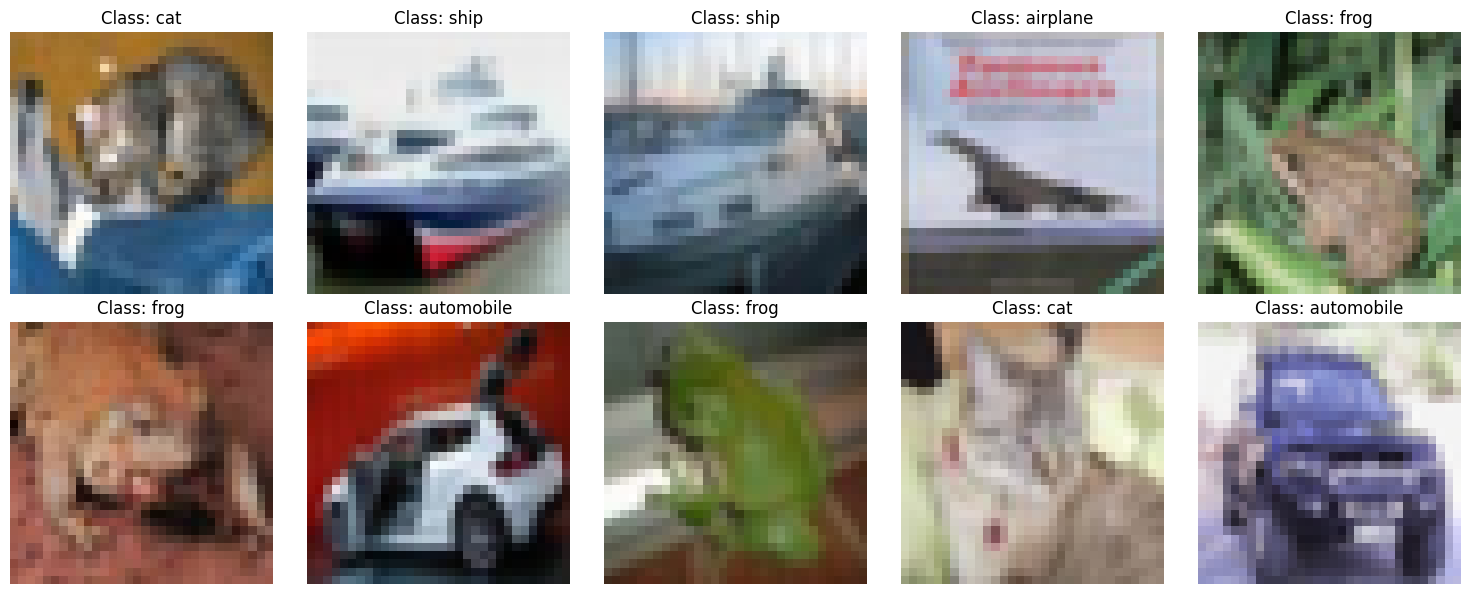


Done! You now have CIFAR-10 validation dataset files for your STM32.


In [1]:
# CIFAR-10 Full Validation Dataset Export (10,000 Images) - FIXED VERSION
# This notebook loads and exports CIFAR-10 validation images in text formats
# with proper error handling and downloads

import numpy as np
import tensorflow as tf
import os
from google.colab import files
import time
from tqdm.notebook import tqdm
import zipfile

print("Setting up the environment...")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert labels from 2D to 1D array
y_test = y_test.flatten()

# Class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"CIFAR-10 test set loaded: {len(x_test)} images")

# Create output directory
output_dir = 'cifar10_output'
os.makedirs(output_dir, exist_ok=True)

# ==== CREATE QUICK TEST FILE (10 IMAGES) ====
print("\nCreating a 10-image quick test file...")
quick_test_file = os.path.join(output_dir, 'cifar10_quick_test_10.txt')
with open(quick_test_file, 'w', newline='\r\n') as f:
    for i in range(10):
        line = f"IMAGE:{i},LABEL:{y_test[i]},"
        for row in range(32):
            for col in range(32):
                r, g, b = x_test[i, row, col]
                line += f"{r},{g},{b},"
        line = line[:-1] + "\n"
        f.write(line)

print("Created quick test file with 10 images")

# ==== CREATE SUBSET FOR TESTING (100 IMAGES) ====
print("\nCreating testing subset (100 images)...")

# Generate a smaller 100-image test file for initial testing
test_file = os.path.join(output_dir, 'cifar10_test_100.txt')
with open(test_file, 'w', newline='\r\n') as f:
    for i in range(100):
        # Start with image index and label
        line = f"IMAGE:{i},LABEL:{y_test[i]},"

        # Add all pixel values in one line
        for row in range(32):
            for col in range(32):
                r, g, b = x_test[i, row, col]
                line += f"{r},{g},{b},"

        # Remove trailing comma and add newline
        line = line[:-1] + "\n"
        f.write(line)

print("Created test file with 100 images")

# Ask if the user wants to generate the full dataset (optional)
generate_full = True  # Set to True to generate all files

if generate_full:
    # ==== GENERATE ONE-LINE FORMAT (MOST EFFICIENT FOR STM32) ====
    print("\nGenerating one-line format files (1000 images each)...")

    # Function to write a batch of images to one-line format
    def write_oneline_batch(file_path, start_idx, end_idx):
        with open(file_path, 'w', newline='\r\n') as f:
            for i in range(start_idx, end_idx):
                # Start with image index and label
                line = f"IMAGE:{i},LABEL:{y_test[i]},"

                # Add all pixel values in one line
                for row in range(32):
                    for col in range(32):
                        r, g, b = x_test[i, row, col]
                        line += f"{r},{g},{b},"

                # Remove trailing comma and add newline
                line = line[:-1] + "\n"
                f.write(line)

    # Generate batches of 1000 images each
    batch_size = 1000
    batch_files = []

    for batch_idx in range(10):  # 10 batches of 1000 = 10,000 images
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(x_test))

        print(f"Generating batch {batch_idx+1}/10 (images {start_idx}-{end_idx-1})...")

        file_path = os.path.join(output_dir, f'cifar10_batch_{batch_idx+1}.txt')
        write_oneline_batch(file_path, start_idx, end_idx)
        batch_files.append(file_path)

    print(f"Generated {len(batch_files)} batch files in one-line format")

    # ==== GENERATE CLASS-SPECIFIC FILES ====
    print("\nGenerating class-specific files...")

    # Create a directory for individual class files
    class_dir = os.path.join(output_dir, 'classes')
    os.makedirs(class_dir, exist_ok=True)

    # Create one file per class in one-line format
    for class_idx in range(10):
        class_indices = np.where(y_test == class_idx)[0]
        class_file = os.path.join(class_dir, f'class_{class_idx}_{class_names[class_idx]}.txt')

        print(f"Generating file for class {class_idx} ({class_names[class_idx]})...")

        with open(class_file, 'w', newline='\r\n') as f:
            for i in class_indices:
                # Start with image index and label
                line = f"IMAGE:{i},LABEL:{class_idx},"

                # Add all pixel values in one line
                for row in range(32):
                    for col in range(32):
                        r, g, b = x_test[i, row, col]
                        line += f"{r},{g},{b},"

                # Remove trailing comma and add newline
                line = line[:-1] + "\n"
                f.write(line)

    print("Generated class-specific files")

# ==== DOCUMENTATION ====
print("\nGenerating documentation...")

readme_content = """# CIFAR-10 Dataset for STM32

This archive contains CIFAR-10 validation images formatted for use with STM32 microcontrollers.

## File Formats

All files use the one-line format where each line contains one complete image:
```
IMAGE:index,LABEL:label,R,G,B,R,G,B,...
```

## Files Included

### Quick Test Files
- `cifar10_quick_test_10.txt`: 10 images (start with this one!)
- `cifar10_test_100.txt`: 100 images (for more thorough testing)

### Full Dataset (if generated)
- `cifar10_batch_X.txt`: 10 files with 1000 images each (full dataset)
- `classes/class_X_name.txt`: One file per class (e.g., airplanes, cars, etc.)

## Class Labels

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

## Tips for STM32 Implementation

1. Start with the 10-image quick test file
2. Open the file and read one line at a time
3. Parse each line into your image array
4. When you reach the end of the file, rewind to the beginning

Example code for reading is included in the STM32 main.c file.
"""

with open(os.path.join(output_dir, 'README.md'), 'w') as f:
    f.write(readme_content)

# ==== ZIP ESSENTIAL FILES FOR DOWNLOAD ====
print("\nCreating ZIP archive for download...")

# Create a zip file with just the essential files (quick test and documentation)
essential_zip_file = 'cifar10_essential.zip'
with zipfile.ZipFile(essential_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add the quick test file
    zipf.write(quick_test_file, os.path.basename(quick_test_file))

    # Add the 100-image test file
    zipf.write(test_file, os.path.basename(test_file))

    # Add the README
    zipf.write(os.path.join(output_dir, 'README.md'), 'README.md')

# Download the essential zip file
files.download(essential_zip_file)

print(f"\nDownload started for {essential_zip_file}")
print("This archive contains the test files you need to get started.")

# Display info about the essential files
essential_size = os.path.getsize(essential_zip_file) / (1024 * 1024)
print(f"\nEssential ZIP file size: {essential_size:.2f} MB")

# If we generated the full dataset, create a separate zip
if generate_full:
    # Create a zip file with all files
    full_zip_file = 'cifar10_full_dataset.zip'
    with zipfile.ZipFile(full_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Add all files in the output directory
        for root, dirs, files_list in os.walk(output_dir):
            for file in files_list:
                file_path = os.path.join(root, file)
                # Calculate the path inside the zip file
                arcname = os.path.relpath(file_path, os.path.dirname(output_dir))
                zipf.write(file_path, arcname)

    # Download the full zip file
    files.download(full_zip_file)

    print(f"\nDownload started for {full_zip_file}")
    print("This archive contains the full CIFAR-10 dataset.")

    # Display info about the full dataset
    full_size = os.path.getsize(full_zip_file) / (1024 * 1024)
    print(f"\nFull dataset ZIP file size: {full_size:.2f} MB")

# Generate a preview of test images
print("\nGenerating preview of test images...")

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Class: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\nDone! You now have CIFAR-10 validation dataset files for your STM32.")